<table style="background-color: rgb(13,32,76); border-radius: 10px">
	<thead>
		<tr>
			<th colspan="2" style="border: hidden; vertical-align: top;" width="15%"><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1674755226__Icons_400px_Practice Assignment.png">
			</th>
			<th style="border: hidden;">
				<h1 style="color: white;">Naive Bayes (Practice)</h1>
			</th>
		</tr>
	</thead>
</table>
<p>This practice assignment will reinforce important learning objectives from the previous lesson(s), and allow you to take on more challenging core assignments, preparing you for graduation.<br></p>
<p>Practice and tinker with this assignment until you're comfortable performing each of the tasks. Then, be sure to submit your output as described in the steps below.</p>
<hr>
<h2>Naive Bayes (Practice)</h2><p>Use the Naive Bayes model to classify text in the following <a href="https://drive.google.com/file/d/1uUtuiAM1AqGvDMrd3-L8vLFfHPrt3pWG/view?usp=sharing" target="_blank" style="background-color: rgb(255, 255, 255);">dataset</a>. is is the "spooky" dataset and represents passages from three famous authors: Edgar Allan Poe, HP Lovecraft, and Mary Shelley. The ultimate goal is a multi-class text classification matching each passage to the correct author.</p><ol><li>Load in the data with 'id' as the index</li><li>Define X as the 'text' column</li><li>Define 'author' as the target</li><li>Train test split, use random_state = 42</li><li>Instantiate a CountVectorizor</li><li>Fit the vectorizor on the training data</li><li>Transform the training and test data </li><li>Instantiate a default MiltinomialNB() model</li><li>Fit on the training data </li><li>Transform the training and test data, make predictions, and evaluate the results with custom evaluation functions</li></ol><p>Solution</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
pd.set_option('display.max_colwidth',300)

In [2]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):
  # Get the classification report
  report = classification_report(y_true, y_pred)
  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)
  ## CONFUSION MATRICES SUBPLOTS
  fig, axes = plt.subplots(ncols=2, figsize=figsize)
  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray', colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")
  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap, colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  # Adjust layout and show figure
  fig.tight_layout()
  plt.show()
  # Return dictionary of classification_report
  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict
def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):
  # Get predictions for training data
  y_train_pred = model.predict(X_train)
  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = model.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )
  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

In [3]:
# Load in the data using your path
df = pd.read_csv("Data/spooky.csv", index_col='id')
df.head()

,text,author
id,,
id26305,"This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.",EAP
id17569,It never once occurred to me that the fumbling might be a mere mistake.,HPL
id11008,"In his left hand was a gold snuff box, from which, as he capered down the hill, cutting all manner of fantastic steps, he took snuff incessantly with an air of the greatest possible self satisfaction.",EAP
id27763,"How lovely is spring As we looked from Windsor Terrace on the sixteen fertile counties spread beneath, speckled by happy cottages and wealthier towns, all looked as in former years, heart cheering and fair.",MWS
id12958,"Finding nothing else, not even gold, the Superintendent abandoned his attempts; but a perplexed look occasionally steals over his countenance as he sits thinking at his desk.",HPL


In [4]:
# Define x and y
X =df['text']
y = df['author']

In [5]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [6]:
len(X_train)

14684

In [7]:
len(X_test)

4895

In [8]:
# Check class balance
y_train.value_counts(normalize=True)

EAP    0.406088
MWS    0.304072
HPL    0.289839
Name: author, dtype: float64

In [9]:
# instantiate a vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train)

CountVectorizer()

In [10]:
# Transform train and test data 
X_train_counts = count_vectorizer.transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         EAP       0.93      0.91      0.92      5963
         HPL       0.94      0.91      0.92      4256
         MWS       0.88      0.93      0.91      4465

    accuracy                           0.92     14684
   macro avg       0.92      0.92      0.92     14684
weighted avg       0.92      0.92      0.92     14684



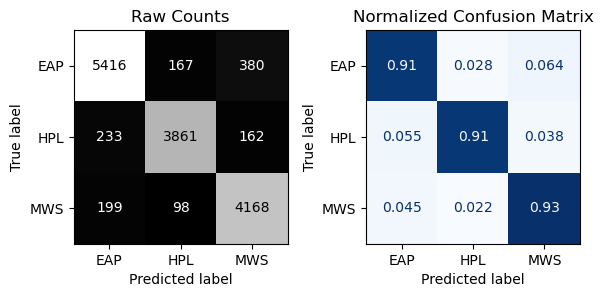


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

         EAP       0.84      0.82      0.83      1937
         HPL       0.86      0.81      0.83      1379
         MWS       0.81      0.87      0.84      1579

    accuracy                           0.83      4895
   macro avg       0.84      0.83      0.83      4895
weighted avg       0.83      0.83      0.83      4895



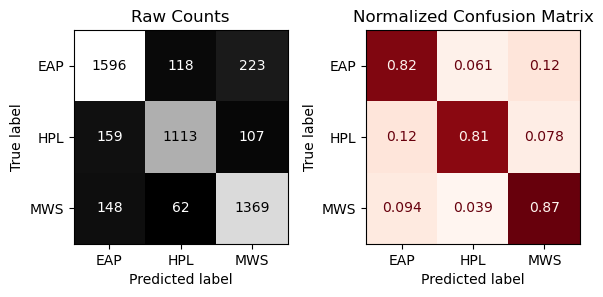

In [11]:
# Instantiate mdoel
clf_nb = MultinomialNB()
# Fit on training data
clf_nb.fit(X_train_counts, y_train)
# Transform, predict, and evaluate with custom function
evaluate_classification(clf_nb, X_train_counts,y_train, X_test_counts, y_test)